# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [83]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [43]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [44]:
cities = pd.DataFrame(cities)

In [54]:
city_data = cities
city_data = city_data.rename(columns = {0:"City"})
city_data["Cloudiness"] = ""
city_data["Country"] = ""
city_data["Date"] = ""
city_data["Humidity"] = ""
city_data["Lat"] = ""
city_data["Lng"] = ""
city_data["Max Temp"] = ""
city_data["Wind Speed"] = ""
city_data.head()

base_url = "https://api.openweathermap.org/data/2.5/weather?"
params = {
    "q" : '',
    "appid" : weather_api_key,
    "units" : "imperial"
}

for index, row in city_data.iterrows():

    city_row =  row['City']
    params["q"] = city_row

    print(f"Processing Record {index}: {city_row}.")
    response = requests.get(base_url, params=params).json()
    
    try:
        city_data.loc[index, "Cloudiness"] = response["clouds"]["all"]
        city_data.loc[index, "Country"] = response["sys"]["country"]
        city_data.loc[index, "Date"] = response["dt"]
        city_data.loc[index, "Humidity"] = response["main"]["humidity"]
        city_data.loc[index, "Lat"] = response["coord"]["lat"]
        city_data.loc[index, "Lng"] = response["coord"]["lon"]
        city_data.loc[index, "Max Temp"] = response["main"]["temp_max"]
        city_data.loc[index, "Wind Speed"] = response["wind"]["speed"]
    except (KeyError, IndexError):
        print("City not found. Skipping...")
        city_data = city_data.drop([index], axis=0)
print("----------")
print("Data Collection Complete.")

3: tsihombe.
City not found. Skipping...
Processing Record 64: tiksi.
Processing Record 65: mys shmidta.
City not found. Skipping...
Processing Record 66: belushya guba.
City not found. Skipping...
Processing Record 67: albany.
Processing Record 68: saint-philippe.
Processing Record 69: beirut.
Processing Record 70: amderma.
City not found. Skipping...
Processing Record 71: leh.
Processing Record 72: lavrentiya.
Processing Record 73: nizhneyansk.
City not found. Skipping...
Processing Record 74: meulaboh.
Processing Record 75: novikovo.
Processing Record 76: illoqqortoormiut.
City not found. Skipping...
Processing Record 77: barrow.
Processing Record 78: kaeo.
Processing Record 79: hithadhoo.
Processing Record 80: teguise.
Processing Record 81: te anau.
Processing Record 82: ganzhou.
Processing Record 83: khovu-aksy.
Processing Record 84: vaini.
Processing Record 85: camana.
Processing Record 86: san patricio.
Processing Record 87: faanui.
Processing Record 88: sao filipe.
Processing R

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [75]:
city_data.to_csv("cities_output.csv")

city_data.count()

City          563
Cloudiness    563
Country       563
Date          563
Humidity      563
Lat           563
Lng           563
Max Temp      563
Wind Speed    563
dtype: int64

In [56]:
city_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,ostrovnoy,100,RU,1584295995,89,68.05,39.51,25.5,24.23
1,egvekinot,99,RU,1584295781,99,66.32,-179.17,8.22,6.24
2,chokurdakh,0,RU,1584295986,71,70.63,147.92,-22.2,4.07
4,mataura,68,NZ,1584295976,91,-46.19,168.86,54,11.01
5,bambous virieux,40,MU,1584296070,83,-20.34,57.76,77,9.86


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

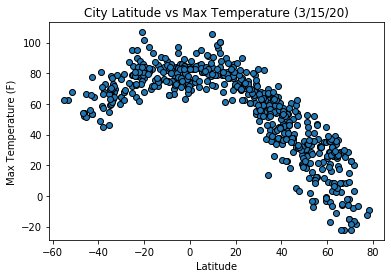

In [76]:
plt.scatter(city_data["Lat"],city_data["Max Temp"], edgecolors = "black")
plt.title("City Latitude vs Max Temperature (3/15/20)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.savefig('lat_vs_temp.png')

#### Latitude vs. Humidity Plot

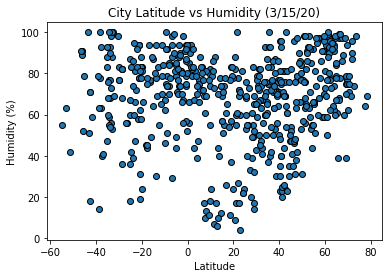

In [77]:
plt.scatter(city_data["Lat"],city_data["Humidity"], edgecolors = "black")
plt.title("City Latitude vs Humidity (3/15/20)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.savefig('lat_vs_humidity.png')

#### Latitude vs. Cloudiness Plot

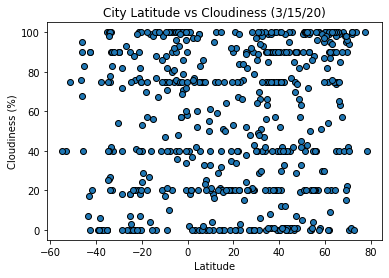

In [78]:
plt.scatter(city_data["Lat"],city_data["Cloudiness"], edgecolors = "black")
plt.title("City Latitude vs Cloudiness (3/15/20)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.savefig('lat_vs_cloudiness.png')

#### Latitude vs. Wind Speed Plot

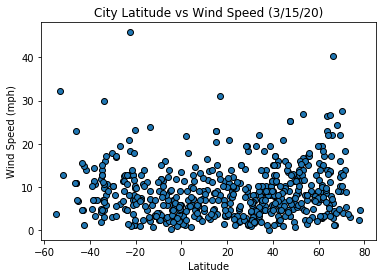

In [79]:
plt.scatter(city_data["Lat"],city_data["Wind Speed"], edgecolors = "black")
plt.title("City Latitude vs Wind Speed (3/15/20)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.savefig('lat_vs_wind.png')

## Linear Regression

In [131]:
# OPTIONAL: Create a function to create Linear Regression plots
def linreg(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x.astype(float), y.astype(float))
    regress_values = x.astype(float) * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x,y, edgecolors = "black")
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,(x.min(),y.min()),fontsize=15,color="red")
    print(f'The r-squared is: {rvalue}')

In [116]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = city_data.loc[city_data["Lat"] >= 0]
southern_df = city_data.loc[city_data["Lat"] <= 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8891910736603734


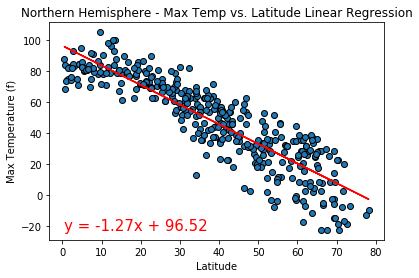

In [145]:
linreg(northern_df["Lat"], northern_df["Max Temp"])
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.ylabel("Max Temperature (f)")
plt.xlabel("Latitude")
plt.savefig('northern_lat_vs_temp.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.584043196420039


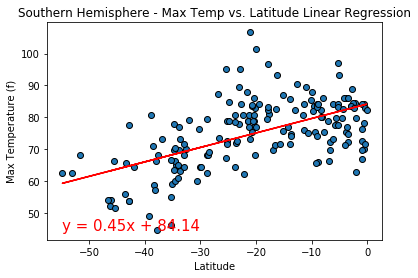

In [146]:
linreg(southern_df["Lat"], southern_df["Max Temp"])
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.ylabel("Max Temperature (f)")
plt.xlabel("Latitude")
plt.savefig('southern_lat_vs_temp.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.29093001387495543


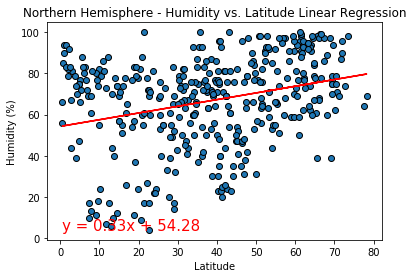

In [147]:
linreg(northern_df["Lat"], northern_df["Humidity"])
plt.title("Northern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.savefig('northern_lat_vs_humid.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.16002050796908435


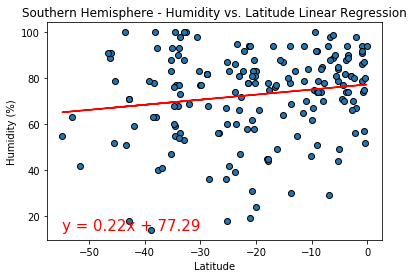

In [148]:
linreg(southern_df["Lat"], southern_df["Humidity"])
plt.title("Southern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.savefig('southern_lat_vs_humid.png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.23758837801313326


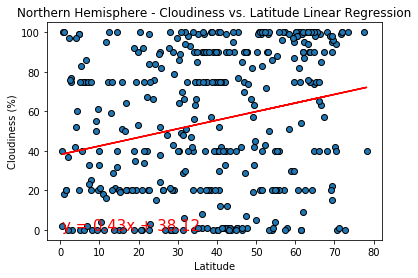

In [149]:
linreg(northern_df["Lat"], northern_df["Cloudiness"])
plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.savefig('northern_lat_vs_cloudiness.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.27440460233210323


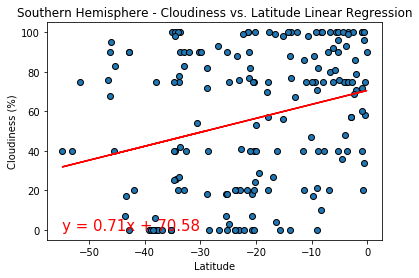

In [150]:
linreg(southern_df["Lat"], southern_df["Cloudiness"])
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.savefig('southern_lat_vs_cloudiness.png')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.18517922649197946


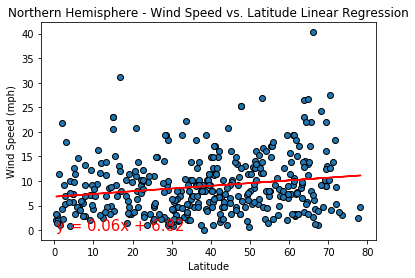

In [152]:
linreg(northern_df["Lat"], northern_df["Wind Speed"])
plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.savefig('northern_lat_vs_wind.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.30303116963449517


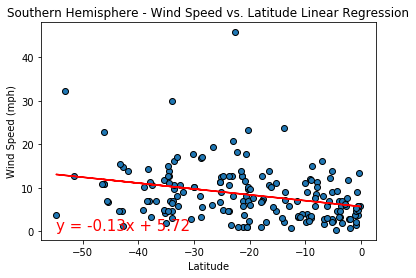

In [153]:
linreg(southern_df["Lat"], southern_df["Wind Speed"])
plt.title("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.savefig('southern_lat_vs_wind.png')